In [57]:
!pip install torch
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [58]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [59]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install PIL

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [61]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [62]:
import os
import glob
import json
import matplotlib.pyplot as plt
import cv2

import random
import torch
import numpy as np

from torchvision.transforms import v2

In [63]:
print(cv2.__version__)

4.13.0


In [64]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [65]:
#@title 재현성을 위한 랜덤 시드 설정
def set_seed(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed) # multi-GPU
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

set_seed(42)
print("✅ Random seed set to 42 for reproducibility")

✅ Random seed set to 42 for reproducibility


In [66]:
!dir

 C ����̺��� ����: OS
 ���� �Ϸ� ��ȣ: 8402-0648

 c:\Users\������\OneDrive\���� ȭ��\�ڵ��� �ڷ�\codeit_5team\notebooks ���͸�

2026-02-02  ���� 08:04    <DIR>          .
2026-02-02  ���� 08:04    <DIR>          ..
2026-01-29  ���� 06:45               470 eda.ipynb
2026-02-02  ���� 08:04         2,613,338 eda0.ipynb
2026-01-29  ���� 06:45               475 model_experiment.ipynb
               3�� ����           2,614,283 ����Ʈ
               2�� ���͸�  520,532,811,776 ����Ʈ ����


In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [68]:
json_dir = r"C:\codit_data\sprint_ai_project1_data\train_annotations"

In [69]:
img_dir = r"C:\codit_data\sprint_ai_project1_data\train_images"

In [70]:
json_list = glob.glob(os.path.join(json_dir, "**"), recursive=True)

In [71]:
json_path_list = [path for path in json_list if os.path.splitext(path)[1] == '.json']

In [72]:
json_path_list[0]

'C:\\codit_data\\sprint_ai_project1_data\\train_annotations\\K-001900-016548-019607-029451_json\\K-001900\\K-001900-016548-019607-029451_0_2_0_2_70_000_200.json'

In [73]:
img_list = glob.glob(os.path.join(img_dir, "**"), recursive=True)

In [74]:
img_path_list = []
for ext in ("*.jpg", "*.png", "*.jpeg"):
    img_path_list.extend(
        glob.glob(os.path.join(img_dir, "**", ext), recursive=True)
    )

In [75]:
img_path_list[0]

'C:\\codit_data\\sprint_ai_project1_data\\train_images\\K-001900-016548-019607-029451_0_2_0_2_70_000_200.png'

In [76]:
json_list = []
for i in range(len(json_path_list)):
    with open(json_path_list[i], "r", encoding="utf-8") as f:
        json_list.append(json.load(f))

In [77]:
json_list[1]["images"][0]["file_name"]

'K-001900-016548-019607-029451_0_2_0_2_75_000_200.png'

In [78]:
json_list[1]["images"][0]["file_name"]

'K-001900-016548-019607-029451_0_2_0_2_75_000_200.png'

In [79]:
json_list[1]["annotations"][0]["bbox"]

[148, 241, 181, 181]

In [80]:
json_list[1]["categories"][0]["name"]

'보령부스파정 5mg'

In [81]:
json_list[1]

{'images': [{'file_name': 'K-001900-016548-019607-029451_0_2_0_2_75_000_200.png',
   'width': 976,
   'height': 1280,
   'imgfile': 'K-001900-016548-019607-029451_0_2_0_2_75_000_200.png',
   'drug_N': 'K-001900',
   'drug_S': '정상알약',
   'back_color': '연회색 배경',
   'drug_dir': '앞면',
   'light_color': '주백색',
   'camera_la': 75,
   'camera_lo': 0,
   'size': 200,
   'dl_idx': '1900',
   'dl_mapping_code': 'K-001900',
   'dl_name': '보령부스파정 5mg',
   'dl_name_en': 'Buspar Tab. 5mg Boryung',
   'img_key': 'http://connectdi.com/design/img/drug/1Mxwka5v0lL.jpg',
   'dl_material': '부스피론염산염',
   'dl_material_en': 'Buspirone Hydrochloride',
   'dl_custom_shape': '정제, 저작정',
   'dl_company': '보령제약(주)',
   'dl_company_en': 'Boryung',
   'di_company_mf': '',
   'di_company_mf_en': '',
   'item_seq': 198700706,
   'di_item_permit_date': '19870323',
   'di_class_no': '[01170]정신신경용제',
   'di_etc_otc_code': '전문의약품',
   'di_edi_code': '641901280,A09302381',
   'chart': '이약은 양면볼록한 장방형의 흰색정제이다',
   'drug_shap

In [82]:
json_list[1]['images'][0]['width']

976

In [83]:
json_list[1]['images'][0]['height']

1280

In [84]:
size_set = set()

for json in json_list:
    size_set.add((json['images'][0]['width'], json['images'][0]['height']))

In [85]:
print(f"train 유니크 이미지 사이즈: {size_set}")

train 유니크 이미지 사이즈: {(976, 1280)}


알약의 이름(클래스)과 위치(바운딩 박스)를 검출해야함

필요한 key: file_name, name

In [86]:
annt_list = [{"file_name":json["images"][0]["file_name"], "pill_name":json["categories"][0]["name"], "bbox":json["annotations"][0]["bbox"]} for json in json_list]

In [87]:
annt_list[0]

{'file_name': 'K-001900-016548-019607-029451_0_2_0_2_70_000_200.png',
 'pill_name': '보령부스파정 5mg',
 'bbox': [644, 845, 189, 190]}

# img_path_list: 이미지 경로, annt_list: annotation 정보

In [88]:
file_name_list = [os.path.basename(path) for path in img_path_list]

In [89]:
pair_annt_list = []
for annt in annt_list:
    if annt["file_name"] in file_name_list:
        pair_annt_list.append(annt)

In [90]:
print(f"전체 annotation 파일 수: {len(annt_list)}, 페어 annotation 파일 수: {len(pair_annt_list)}")

전체 annotation 파일 수: 763, 페어 annotation 파일 수: 763


In [91]:
print(f"이미지 파일 수: {len(img_path_list)}")

이미지 파일 수: 232


In [92]:
n_set = set()

for annt in annt_list:
    n_set.add(annt["file_name"])

an_n_list = list(n_set)

In [93]:
temp_list = []
for name in file_name_list:
    if name in an_n_list:
        temp_list.append(name)

In [94]:
print(f"anntation이 있는 이미지 파일 수: {len(temp_list)}")

anntation이 있는 이미지 파일 수: 232


In [95]:
img_path_list[0]

'C:\\codit_data\\sprint_ai_project1_data\\train_images\\K-001900-016548-019607-029451_0_2_0_2_70_000_200.png'

In [96]:
path = img_path_list[0]
file_name = os.path.basename(path)

annts = []
for annt in pair_annt_list:
    if annt["file_name"] == file_name:
        annts.append(annt)

img = cv2.imread(img_path_list[0])

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for annt in annts:
    cv2.rectangle(image_rgb, (annt["bbox"][0], annt["bbox"][1]), (annt["bbox"][0]+annt["bbox"][2], annt["bbox"][1]+annt["bbox"][3]), (0, 0, 255), 2)
    cv2.putText(image_rgb, annt["pill_name"], (annt["bbox"][0], annt["bbox"][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    print(annt["pill_name"])

보령부스파정 5mg
가바토파정 100mg
스토가정 10mg
레일라정


In [97]:
from PIL import Image, ImageDraw, ImageFont


path = img_path_list[0]
file_name = os.path.basename(path)

annts = []
for annt in pair_annt_list:
    if annt["file_name"] == file_name:
        annts.append(annt)


image_pil = Image.open(img_path_list[0]).convert("RGB")

draw = ImageDraw.Draw(image_pil)

try:
    font = ImageFont.truetype("malgun.ttf", 40)
except IOError:
    font = ImageFont.load_default()


for annt in annts:
    x, y, w, h = annt["bbox"]

    draw.rectangle(
        [(x, y), (x + w, y + h)], 
        outline=(0, 0, 255), 
        width=2
    )
    # 텍스트 쓰기
    draw.text(
        (x, y - 70),
        annt["pill_name"], 
        font=font, 
        fill=(0, 0, 255)
    )
    print(annt["pill_name"])

보령부스파정 5mg
가바토파정 100mg
스토가정 10mg
레일라정


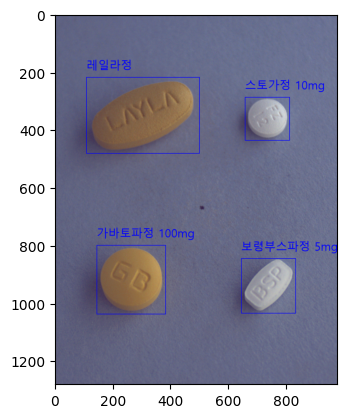

In [98]:
plt.imshow(image_pil)

plt.show()

In [99]:
from PIL import Image, ImageDraw, ImageFont


path = img_path_list[0]
file_name = os.path.basename(path)

annts = []
for annt in pair_annt_list:
    if annt["file_name"] == file_name:
        annts.append(annt)


image_pil = Image.open(img_path_list[0]).convert("RGB")

draw = ImageDraw.Draw(image_pil)

try:
    font = ImageFont.truetype("malgun.ttf", 40)
except IOError:
    font = ImageFont.load_default()


for annt in annts:
    x, y, w, h = annt["bbox"]

    r = 10
    draw.ellipse((x-r, y-r, x+r, y+r), fill=(0, 0, 255))
    # 텍스트 쓰기
    draw.text(
        (x, y - 70),
        "x_min, y_min point", 
        font=font,
        fill=(0, 0, 255)
    )
    print(annt["pill_name"])

보령부스파정 5mg
가바토파정 100mg
스토가정 10mg
레일라정


# Faster R-CNN annotation

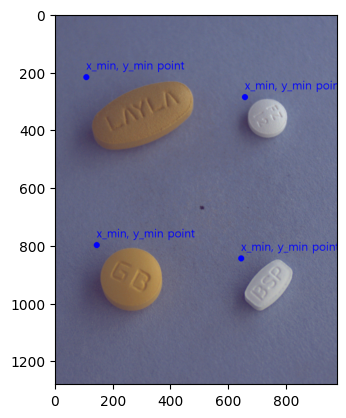

In [100]:
plt.imshow(image_pil)

plt.show()

In [101]:
from PIL import Image, ImageDraw, ImageFont


path = img_path_list[0]
file_name = os.path.basename(path)

annts = []
for annt in pair_annt_list:
    if annt["file_name"] == file_name:
        annts.append(annt)


image_pil = Image.open(img_path_list[0]).convert("RGB")

draw = ImageDraw.Draw(image_pil)

try:
    font = ImageFont.truetype("malgun.ttf", 40)
except IOError:
    font = ImageFont.load_default()


for annt in annts:
    x, y, w, h = annt["bbox"]

    draw.line((x, y-10, x+w, y-10), fill=(0,0,255), width=5)

    draw.line((x-10, y, x-10, y+h), fill=(0,0,255), width=5)

    
    # 텍스트 쓰기
    draw.text(
        (x+w+10, y-10),
        "width", 
        font=font, 
        fill=(0, 0, 255)
    )

    draw.text(
        (x-40, y+h+10),
        "height", 
        font=font, 
        fill=(0, 0, 255)
    )
    
    print(annt["pill_name"])

보령부스파정 5mg
가바토파정 100mg
스토가정 10mg
레일라정


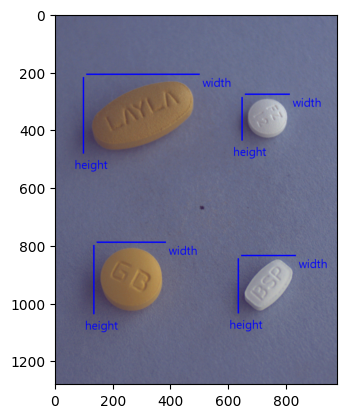

In [102]:
plt.imshow(image_pil)

plt.show()

# YOLO annotation

In [103]:
from PIL import Image, ImageDraw, ImageFont

width = 976
height = 1280


path = img_path_list[0]
file_name = os.path.basename(path)

annts = []
for annt in pair_annt_list:
    if annt["file_name"] == file_name:
        annts.append(annt)


image_pil = Image.open(img_path_list[0]).convert("RGB")

draw = ImageDraw.Draw(image_pil)

try:
    font = ImageFont.truetype("malgun.ttf", 50)
except IOError:
    font = ImageFont.load_default()

color = [(0, 255, 0), (255, 0, 0), (0, 255, 255), (0, 0, 255)]
i=0
cnt=3
for annt in annts:
    if i == cnt:
        x, y, w, h = annt["bbox"]
    
        r = 10
        draw.ellipse((int(x+w/2)-r, (int(y+h/2))-r, int(x+w/2)+r, (int(y+h/2))+r), fill=color[i])
        draw.line((0, (int(y+h/2)), width, (int(y+h/2))), fill=color[i], width=5)
        draw.line(((int(x+w/2)), 0, (int(x+w/2)), height), fill=color[i], width=5)
        
        # 텍스트 쓰기
        draw.text(
            (int(x+w/2)+10, (int(y+h/2)) - 70),
            f"<x_center>:{(int(y+h/2))/width:.4f}", 
            font=font,
            fill=color[i]
        )
        draw.text(
            (int(x+w/2)+10, (int(y+h/2))),
            f"<y_center>:{(int(y+h/2))/height:.4f}", 
            font=font,
            fill=color[i]
        )
    if i == cnt:
        break
    i+=1

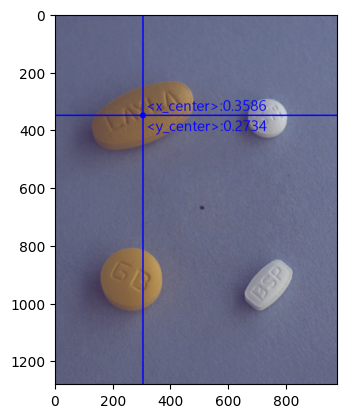

In [104]:
plt.imshow(image_pil)

plt.show()

In [105]:
from PIL import Image, ImageDraw, ImageFont


path = img_path_list[0]
file_name = os.path.basename(path)

annts = []
for annt in pair_annt_list:
    if annt["file_name"] == file_name:
        annts.append(annt)


image_pil = Image.open(img_path_list[0]).convert("RGB")

draw = ImageDraw.Draw(image_pil)

try:
    font = ImageFont.truetype("malgun.ttf", 50)
except IOError:
    font = ImageFont.load_default()

i = 0
cnt = 3
for annt in annts:
    if i == cnt:
        x, y, w, h = annt["bbox"]
    
        draw.line((x, y-10, x+w, y-10), fill=(0,0,255), width=5)
    
        draw.line((x-10, y, x-10, y+h), fill=(0,0,255), width=5)
    
        
        # 텍스트 쓰기
        draw.text(
            (x+w+10, y-10),
            f"<width>:{w/width:.4f}", 
            font=font, 
            fill=(0, 0, 255)
        )
    
        draw.text(
            (x-40, y+h+10),
            f"<height>:{h/height:.4f}", 
            font=font, 
            fill=(0, 0, 255)
        )
    i+=1
    


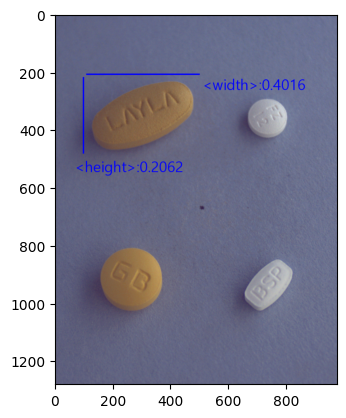

In [106]:
plt.imshow(image_pil)

plt.show()

In [107]:
img = img_path_list[0]

bright_val = 0.0
bright_name = ""
bright_index = 0

dark_val = 100.0
dark_name = ""
dark_index = 0

i = 0
for img in img_path_list:
    image_pil = Image.open(img).convert("RGB")
    brightness = np.array(image_pil.convert("L")).mean()
    
    if brightness > bright_val:
        bright_name = os.path.basename(img)
        bright_val = brightness
        bright_index = i

    if brightness < dark_val:
        dark_name = os.path.basename(img)
        dark_val = brightness
        dark_index = i
        
    i+=1

In [108]:
print(bright_name)
print(bright_val)
print(bright_index)
print()
print(dark_name)
print(dark_val)
print(dark_index)

K-002483-003743-012778-013395_0_2_0_2_70_000_200.png
163.59371638063524
15

K-001900-016548-024850-029345_0_2_0_2_75_000_200.png
98.55192590932377
10


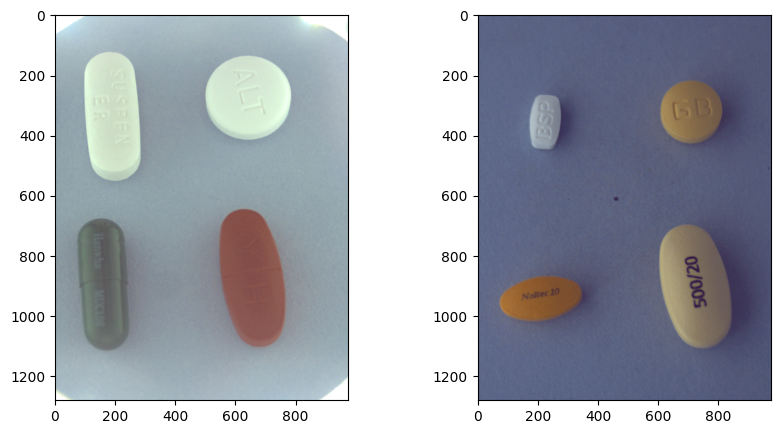

In [109]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

image_bright = Image.open(img_path_list[bright_index]).convert("RGB")
image_dark = Image.open(img_path_list[dark_index]).convert("RGB")

axes[0].imshow(image_bright)

axes[1].imshow(image_dark)

plt.show()

In [110]:
transforms = v2.Compose([ 
    v2.ToImage(),                           # PIL / ndarray → Tensor Image
    v2.ToDtype(torch.float32, scale=True),
    v2.ColorJitter(
        brightness=1.0,
        contrast=1.0
    )
])

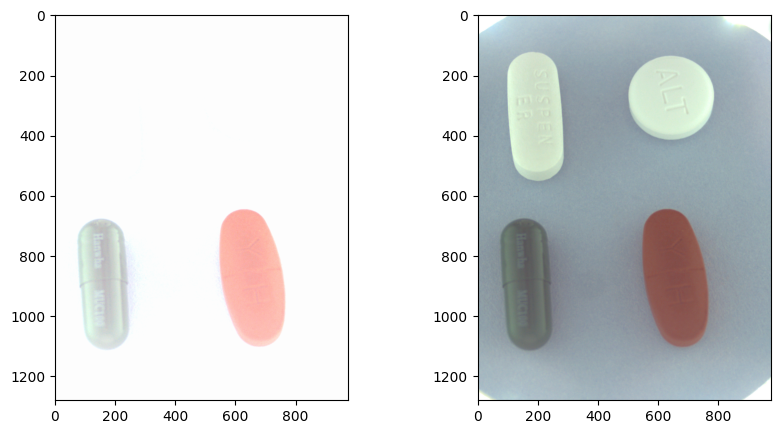

In [111]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

image_bright = Image.open(img_path_list[bright_index]).convert("RGB")
image_dark = Image.open(img_path_list[dark_index]).convert("RGB")

image_bright2 = transforms(image_bright)

axes[0].imshow(image_bright2.squeeze().permute(1,2,0))

axes[1].imshow(image_bright)

plt.show()

In [112]:
annt_area_list = [{"file_name":json["images"][0]["file_name"], "area":json["annotations"][0]["area"]} for json in json_list]

In [113]:
area_int_list = []
for annt in annt_area_list:
    area_int_list.append(annt["area"])

print(f"bbox 평균 넓이: {np.mean(area_int_list).item():.4f}")

bbox 평균 넓이: 70416.9161


In [114]:
annt_area_list_sorted = sorted(
    annt_area_list,
    key=lambda x: x["area"]
)

In [115]:
print(f"가장 작은 bbox 면적: {annt_area_list_sorted[0]["area"]}")
print(f"가장 큰 bbox 면적: {annt_area_list_sorted[-1]["area"]}")

가장 작은 bbox 면적: 23250
가장 큰 bbox 면적: 272435


In [116]:
print(annt_area_list_sorted[0])
print(annt_area_list_sorted[-1])

{'file_name': 'K-001900-016548-019607-029451_0_2_0_2_70_000_200.png', 'area': 23250}
{'file_name': 'K-003351-016688-020014_0_2_0_2_90_000_200.png', 'area': 272435}


In [117]:
sm_idx = 0
lg_idx = 0
i = 0
for path in img_path_list:
    if "K-001900-016548-019607-029451_0_2_0_2_70_000_200.png" == os.path.basename(path):
        sm_idx = i
    if "K-003351-016688-020014_0_2_0_2_90_000_200.png" == os.path.basename(path):
        lg_idx = i
    i += 1

i=0
annt_sm_idx_list = []
annt_lg_idx_list = []
for annt in annt_list:
    if "K-001900-016548-019607-029451_0_2_0_2_70_000_200.png" == annt["file_name"]:
        annt_sm_idx_list.append(i)
    if "K-003351-016688-020014_0_2_0_2_90_000_200.png" == annt["file_name"]:
        annt_lg_idx_list.append(i)
    i += 1

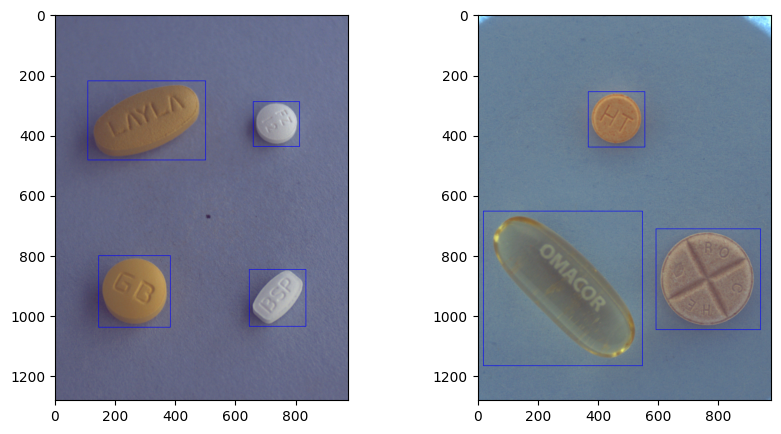

In [118]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

image_sm = Image.open(img_path_list[sm_idx]).convert("RGB")
image_lg = Image.open(img_path_list[lg_idx]).convert("RGB")

draw0 = ImageDraw.Draw(image_sm)
draw1 = ImageDraw.Draw(image_lg)

for idx in annt_sm_idx_list:
    annt = annt_list[idx]
    x, y, w, h = annt["bbox"]
    draw0.rectangle(
        [(x, y), (x + w, y + h)], 
        outline=(0, 0, 255), 
        width=2
    )
for idx in annt_lg_idx_list:
    annt = annt_list[idx]
    x, y, w, h = annt["bbox"]
    draw1.rectangle(
        [(x, y), (x + w, y + h)], 
        outline=(0, 0, 255), 
        width=2
    )


axes[0].imshow(image_sm)

axes[1].imshow(image_lg)

plt.show()

In [119]:
area_list = [area["area"] for area in annt_area_list_sorted]

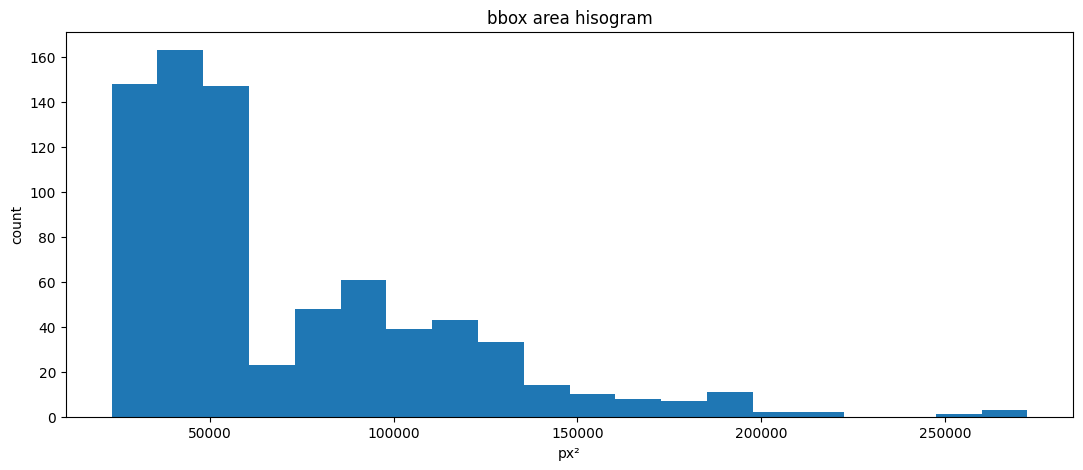

In [120]:
plt.figure(figsize=(13,5))
plt.title("bbox area hisogram")
plt.xlabel("px²")
plt.ylabel("count")
plt.hist(area_list, bins=20)
plt.show()